# Inicialização dataset - Task [001]

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ftfy import fix_text
from sklearn.preprocessing import MinMaxScaler
from category_encoders import BinaryEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [6]:
# open the csv file with pandas and read it into a dataframe
df = pd.read_csv('../datasets/WineDataset.csv')
df2 = pd.read_csv('../datasets/XWines_Full_100K_wines.csv')
df3 = pd.read_csv('../datasets/merged_wine_dataset.csv')

In [ ]:
# print all the information about the dataframe
df.info()
df.describe()

In [ ]:
# print all the information about the dataframe
df2.info()
df2.describe()

In [ ]:
# print all the information about the dataframe
df3.info()
df3.describe()

In [7]:
# fix text using ftfy
# fix all the columns except when the column is a float
for col in df.columns:
    if df[col].dtype == 'object': 
        df[col] = df[col].apply(lambda x: fix_text(x) if isinstance(x, str) else x)

# fix text using ftfy
# fix all the columns except when the column is a float
for col in df2.columns:
    if df2[col].dtype == 'object': 
        df2[col] = df2[col].apply(lambda x: fix_text(x) if isinstance(x, str) else x)

In [8]:
# view all the unique values for each column except for the columns:'Title' 'Description', 'Country', 'Unit' 'Region' 'Appellation'
for col in df.columns:
    if col not in ['Title', 'Description', 'Country', 'Unit', 'Region', 'Appellation']:
        print(col, df[col].unique())

Price ['£9.99 per bottle' '£15.99 per bottle' '£12.49 per bottle'
 '£17.99 per bottle' '£300.00 per bottle' '£12.99 per bottle'
 '£80.00 per bottle' '£13.99 per bottle' '£8.99 per bottle'
 '£11.99 per bottle' '£46.99 per bottle' '£11.29 per bottle'
 '£22.99 per bottle' '£45.99 per bottle' '£49.99 per bottle'
 '£33.99 per bottle' '£23.99 per bottle' '£21.99 per bottle'
 '£42.99 per bottle' '£29.99 per bottle' '£39.99 per bottle'
 '£14.99 per bottle' '£16.99 per bottle' '£7.99 per bottle'
 '£18.99 per bottle' '£19.99 per bottle' '£10.99 per bottle'
 '£34.99 per bottle' '£43.99 per bottle' '£24.99 per bottle'
 '£35.99 per bottle' '£37.99 per bottle' '£99.99 per bottle'
 '£75.99 per bottle' '£79.00 per case' '£61.99 per bottle'
 '£57.99 per bottle' '£20.99 per bottle' '£44.99 per bottle'
 '£36.99 per bottle' '£69.99 per bottle' '£25.99 per bottle'
 '£6.99 per bottle' '£48.99 per bottle' '£13.00 per bottle'
 '£93.99 per bottle' '£26.99 per bottle' '£49.00 per case'
 '£59.94 per case' '£200.

In [ ]:
for col in df3.columns:
    if col not in ['WineName', 'WineryName', 'Grape', 'Secondary Grape Varieties', 'Country', 'Region', 'Appellation', 'Style', 'Characteristics', 'Description']:
        print(col, df3[col].unique())

# Limpeza de dados
- Remoção de valores nulos
- Normalização de valores
- Remoção de colunas desnecessárias

In [9]:
# Print wine where wineid 131027
print(df2.loc[df2['WineID'] == 131027])

#One-Hot Encoding for the column 'Type' 'Elaborate' 'Body', 'Acidity'

one_hot_encoded_df = pd.get_dummies(df2, columns=['Type','Body','Acidity','Elaborate'], prefix=['Type','Body','Acidity','Elaborate'])

# Binary Encoding for the column 'Country', 'RegionName', 'Grapes', 'Harmonize'

encoder = BinaryEncoder(cols=['Grapes', 'Harmonize'], return_df=True)
binary_encoded_df = encoder.fit_transform(df2)

encoded_df = pd.concat([one_hot_encoded_df, binary_encoded_df], axis=1)

# Normalize the 'ABV' column using MinMaxScaler
scaler = MinMaxScaler()

# Normalizing the 'ABV' column
encoded_df['ABV'] = scaler.fit_transform(encoded_df[['ABV']])


encoded_df = encoded_df.drop(columns=df2.columns)	
encoded_df = encoded_df.dropna()

# Display the updated DataFrame
print(encoded_df)

       WineID           WineName  Type         Elaborate  \
31005  131027  Rosé Alcohol Free  Rosé  Assemblage/Blend   

                         Grapes  \
31005  ['Chardonnay', 'Merlot']   

                                               Harmonize  ABV           Body  \
31005  ['Beef', 'Pork', 'Game Meat', 'Rich Fish', 'Ve...  0.0  Medium-bodied   

      Acidity Code Country  RegionID RegionName  WineryID   WineryName  \
31005  Medium   FR  France      1327  Languedoc     25983  Pierre Zero   

                           Website  \
31005  https://www.pierre-zero.com   

                                                Vintages  
31005  [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...  


/Users/rcmanoel/MEIA/projetos/challenge2/MEIA_ISEP_TEAM7_2024_2025_Challenge_2/.venv/lib/python3.12/site-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


        Type_Dessert  Type_Dessert/Port  Type_Red  Type_Rosé  Type_Sparkling  \
0              False              False     False      False            True   
1              False              False      True      False           False   
2              False              False      True      False           False   
3              False              False     False      False           False   
4              False              False      True      False           False   
...              ...                ...       ...        ...             ...   
100641         False              False     False      False           False   
100642          True              False     False      False           False   
100643         False              False     False      False           False   
100644         False              False     False      False           False   
100645         False              False      True      False           False   

        Type_White  Body_Full-bodied  B

# Classification Dataset Preprocessing - Task [066]
### Normalizing Harmonize and grouping it into broader categories

In [10]:
#Count how many grapes in the column grapes are unique grapes are in a array
grapes = df2['Grapes'].str.split(',').explode().unique()

#Remove every "]"" and "[" and "," and "'" and remove spaces if they are in the first character or the last character
grapes = [grape.replace(']', '').replace('[', '').replace(',', '').replace("'", '').strip() for grape in grapes]

grapes2 = ['Tempranillo', 'Chardonnay', 'Sauvignon Blanc', 'Pinot Noir', 'Glera', 'Chenin Blanc', 'Castelão ', 'Malagousia', 'Cinsault', 'Grenache', 'Shiraz', 'Cabernet Sauvignon', 'Bacchus', 'Viognier', 'Pinot Grigio', 'Garnacha', 'Malbec', 'Cortese', 'Merlot', 'Melon De Bourgogne', 'Carménère', 'Zinfandel', 'Syrah', 'Marsanne', 'Gruner Veltliner', 'Corvina', 'Greco', 'Macabeo', 'Gamay', 'Loureiro', 'Riesling', 'Alvarinho', 'Mourvèdre', 'Cabernet Franc', 'Vespaiola', 'Picpoul', 'Vermentino', 'Sangiovese', 'Pinot Meunier', 'Verdejo', 'Primitivo', 'Pinotage', 'Alicante Bouschet', 'Garganega', 'Godello', 'Carignan', 'Grenache Blanc', 'Aligoté', 'Siegerrebe', 'Touriga Nacional', 'Albarino', 'Nerello Mascalese', "Nero D'Avola", 'Turbiana', 'Pinot Gris', 'Airen', 'Trincadeira', 'Tinta Roriz', 'Xinomavro', 'Agiorgitiko', 'Pais', 'Gewürztraminer', 'Mencia', 'Verdicchio', 'Fiano', 'Rondinella', 'Mauzac', 'Nebbiolo', 'Lambrusco Grasparossa', 'Pecorino', 'Negroamaro', 'Fernão Pires', 'Feteasca Alba', 'Zwieigelt', 'Grillo', 'Tinta Barroca', 'Furmint', 'Touriga Franca', 'Pedro Ximénez', 'Palomino', 'Viura', 'Montepulciano', 'Barbera', 'Malvasia', 'Arinto', 'Colombard', 'Sémillon', 'Jacquere', 'Pinot Blanc', 'Rkatsiteli', 'Syrah-Shiraz', 'Torrontes', 'Sauvignon Gris', 'Assyrtiko', 'Moscato', 'Rolle', 'Huxelrebe', 'Xarel-Lo', 'Niellucciu', 'Saperavi', 'Rara Neagra', 'Non Varietal', 'Muscat', 'Monastrell', 'Dolcetto', 'Black Muscat', 'Nerello', 'Roussanne', 'Tibouren', 'Grolleau', 'Inzolia', 'Falanghina', 'Aglianico']

# Create a new array of grapes where both of the grapes match
grapes = list(set(grapes) & set(grapes2))
print(grapes)

df2['Grapes'] = df2['Grapes'].apply(lambda x: ast.literal_eval(x))

df2['Grapes'] = df2['Grapes'].apply(
    lambda x: [grape for grape in x if grape in grapes]
)

# Drop rows where the resulting 'Grapes' column is empty
df2 = df2[df2['Grapes'].str.len() > 0]

df2['Grapes'] = df2['Grapes'].apply(
    lambda x: x[0]
)

# Replace dishes with their broader categories in the Harmonize column
df2['Harmonize'] = df2['Harmonize'].apply(eval)
dish_to_category = {
    'Beef': 'Meat', 'Lamb': 'Meat', 'Pork': 'Meat', 'Veal': 'Meat', 'Game Meat': 'Meat',
    'Duck': 'Meat', 'Ham': 'Meat', 'Cold Cuts': 'Meat', 'Cured Meat': 'Meat',
    'Poultry': 'Poultry', 'Chicken': 'Poultry',
    'Rich Fish': 'Fish & Seafood', 'Lean Fish': 'Fish & Seafood', 'Shellfish': 'Fish & Seafood',
    'Seafood': 'Fish & Seafood', 'Sushi': 'Fish & Seafood', 'Sashimi': 'Fish & Seafood',
    'Codfish': 'Fish & Seafood', 'Fish': 'Fish & Seafood', 'Grilled': 'Fish & Seafood',
    'Soft Cheese': 'Cheese', 'Hard Cheese': 'Cheese', 'Blue Cheese': 'Cheese',
    'Maturated Cheese': 'Cheese', 'Goat Cheese': 'Cheese', 'Mild Cheese': 'Cheese',
    'Medium-cured Cheese': 'Cheese', 'Cheese': 'Cheese',
    'Pasta': 'Pasta', 'Tagliatelle': 'Pasta', 'Lasagna': 'Pasta',
    'Paella': 'Fish & Seafood', 'Pizza' : 'Pasta',
    'Vegetarian': 'Vegetarian & Vegan', 'Mushrooms': 'Vegetarian & Vegan', 'Salad': 'Vegetarian & Vegan',
    'Fruit': 'Vegetarian & Vegan', 'Tomato Dishes': 'Vegetarian & Vegan', 'Beans': 'Vegetarian & Vegan',
    'Eggplant Parmigiana': 'Vegetarian & Vegan', 'Light Stews': 'Vegetarian & Vegan',
    'Appetizer': 'Appetizers & Snacks', 'Snack': 'Appetizers & Snacks',
    'Aperitif': 'Appetizers & Snacks', 'French Fries': 'Appetizers & Snacks', 'Baked Potato': 'Appetizers & Snacks',
    'Cream': 'Appetizers & Snacks',
    'Sweet Dessert': 'Desserts', 'Fruit Dessert': 'Desserts', 'Citric Dessert': 'Desserts',
    'Cake': 'Desserts', 'Chocolate': 'Desserts', 'Cookies': 'Desserts',
    'Chestnut': 'Desserts', 'Spiced Fruit Cake': 'Desserts', 'Dessert': 'Desserts',
    'Soufflé': 'Desserts', 'Dried Fruits': 'Desserts',
    'Spicy Food': 'Spicy Food', 'Curry Chicken': 'Spicy Food', 'Asian Food': 'Spicy Food', 'Yakissoba': 'Spicy Food',
    'Barbecue': 'Meat', 'Roast': 'Meat'
}

columns = df2.columns
new_harmonize = df2.copy()
new_harmonize['Harmonize'] = df2['Harmonize'].apply(lambda x: list(set(dish_to_category.get(dish, dish) for dish in x)))

# Expand the Harmonize column into multiple rows, one for each dish
new_harmonize = new_harmonize.explode('Harmonize')

# Reset the index for consistency and remove any rows with 'Risotto' because it has a number of insignificant occurrences
new_harmonize.reset_index(drop=True, inplace=True)
new_harmonize = new_harmonize[new_harmonize['Harmonize'].apply(lambda x: 'Risotto' not in x)]
df2 = new_harmonize.copy()

# Get the unique dishes
unique_categories = df2['Harmonize'].unique()

# One-hot encoding
for dish in unique_categories:
    new_harmonize[f'Harmonize_{dish}'] = new_harmonize['Harmonize'].apply(lambda x: x == dish)
# Turn new_harmonize into a harmonize dataframe
new_harmonize = new_harmonize.drop(columns=columns)

['Corvina', 'Pinot Blanc', 'Agiorgitiko', 'Dolcetto', 'Tempranillo', 'Barbera', 'Pinot Gris', 'Riesling', 'Alicante Bouschet', 'Bacchus', 'Vespaiola', 'Malvasia', 'Xinomavro', 'Nerello Mascalese', 'Arinto', 'Falanghina', 'Pinot Meunier', 'Cabernet Franc', 'Viura', 'Montepulciano', 'Furmint', 'Rkatsiteli', 'Grillo', 'Aglianico', 'Sauvignon Blanc', 'Pinot Noir', 'Grenache', 'Verdejo', 'Assyrtiko', 'Godello', 'Nebbiolo', 'Airen', 'Cinsault', 'Cortese', 'Garganega', 'Malbec', 'Tinta Roriz', 'Tinta Barroca', 'Roussanne', 'Feteasca Alba', 'Huxelrebe', 'Monastrell', 'Inzolia', 'Primitivo', 'Turbiana', 'Garnacha', 'Cabernet Sauvignon', 'Chenin Blanc', 'Marsanne', 'Aligoté', 'Pecorino', 'Alvarinho', 'Saperavi', 'Negroamaro', 'Sauvignon Gris', 'Macabeo', 'Palomino', 'Tibouren', 'Touriga Franca', 'Pinot Grigio', 'Sangiovese', 'Zinfandel', 'Viognier', 'Verdicchio', 'Fiano', 'Greco', 'Siegerrebe', 'Gewürztraminer', 'Pinotage', 'Touriga Nacional', 'Grolleau', 'Chardonnay', 'Loureiro', 'Trincadeira',

### Normalizing the rest of the columns

In [11]:
#One-Hot Encoding for the column 'Type' 'Elaborate' 'Body', 'Acidity', 'Grapes'
one_hot_encoded_df = pd.get_dummies(df2, columns=['Type', 'Elaborate', 'Body', 'Acidity', 'Grapes'])

encoded_df = one_hot_encoded_df.copy()

# Maximum ABV value
print(encoded_df['ABV'].min())
print(encoded_df['ABV'].max())

# Normalizing the 'ABV' column
scaler = MinMaxScaler()
encoded_df['ABV'] = scaler.fit_transform(encoded_df[['ABV']])

# Dropping unnecessary columns
encoded_df = encoded_df.drop(columns=['Country', 'RegionName', 'Code', 'WineName', 'WineID', 'Vintages', 'Website', 'WineryID', 'WineryName', 'RegionID','Harmonize'])
encoded_df = encoded_df.dropna()
# add new_harmonize to the encoded_df
encoded_df = pd.concat([encoded_df, new_harmonize], axis=1)

0.0
48.0


### Boxplot

In [ ]:
# Calculate the IQR
numeric_df = encoded_df['ABV']
q1 = numeric_df.quantile(0.25)
q3 = numeric_df.quantile(0.75)
iqr = q3 - q1

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=numeric_df, showmeans=True, orient="h")

Analyzing the resulting boxplot, we observe that some values fall outside the ranges but are still relevant, as 0% alcohol wines, including dealcoholized varieties, remain within the wine category. These options retain the essence of traditional wines without alcohol. Additionally, beverages like firewater, with higher alcohol content, can also bring value to the project.

### Correlation Matrix

In [ ]:
# Compute the correlation matrix without the Elaborate columns to reduce the size of the heatmap
drop_columns = encoded_df.columns[encoded_df.columns.str.startswith('Elaborate_')]
drop_columns = drop_columns.append(encoded_df.columns[encoded_df.columns.str.startswith('Grapes_')])
matrix_df = encoded_df.drop(columns=drop_columns)
correlation_matrix = matrix_df.corr()


plt.figure(figsize=(20, 15))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    annot_kws={"size": 10}
)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

Analyzing the matrix, we observe that it is relatively ‘cold,’ meaning it exhibits a low correlation index overall. Despite the generally low correlations between features, certain specific relationships do stand out. For instance, some dishes in the ‘Harmonize’ category show a notable correlation with particular wines, while certain body characteristics correlate with the alcohol by volume (ABV) and wine types.

### PCA

In [ ]:
from sklearn.decomposition import PCA

harmonize_columns = [col for col in encoded_df.columns if col.startswith('Harmonize_')]

# Loop through each 'harmonize_' column and perform PCA
for label_col in harmonize_columns:
    print(f"Generating PCA plot for label column: {label_col}")

    features = encoded_df.drop(columns=[label_col])
    labels = encoded_df[label_col].values

    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(features)

    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        plt.scatter(
            df_pca[labels == label, 0], 
            df_pca[labels == label, 1], 
            label=f'Classe {label}'
        )

    plt.title(f'PCA - Column: {label_col}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.grid()
    plt.show()


When applying PCA to identify patterns and relationships among the different categories in the ‘Harmonize’ column, we encountered inconclusive results. The resulting plots showed the various categories exhibiting similar patterns, with data points widely scattered across the graphical space rather than concentrated in specific zones.

### AdaBoost (Type columns)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

**Data preparation for Adaboost**

In [13]:
harmonize_columns = [col for col in encoded_df.columns if col.startswith('Harmonize_')]
type_columns = [col for col in encoded_df.columns if col.startswith('Type_')]

X = encoded_df[harmonize_columns]
y = encoded_df[type_columns]

**The training model**

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END estimator__max_depth=1, estimator__min_samples_leaf=1, estimator__min_samples_split=2, learning_rate=0.01, n_estimators=50; total time=   0.7s
[CV] END estimator__max_depth=1, estimator__min_samples_leaf=1, estimator__min_samples_split=2, learning_rate=0.01, n_estimators=50; total time=   0.8s
[CV] END estimator__max_depth=1, estimator__min_samples_leaf=1, estimator__min_samples_split=2, learning_rate=0.01, n_estimators=50; total time=   0.7s
[CV] END estimator__max_depth=1, estimator__min_samples_leaf=1, estimator__min_samples_split=2, learning_rate=0.01, n_estimators=100; total time=   1.3s
[CV] END estimator__max_depth=1, estimator__min_samples_leaf=1, estimator__min_samples_split=2, learning_rate=0.01, n_estimators=100; total time=   1.3s
[CV] END estimator__max_depth=1, estimator__min_samples_leaf=1, estimator__min_samples_split=2, learning_rate=0.01, n_estimators=100; total time=   1.3s
[CV] END estimator__ma

/Users/rcmanoel/MEIA/projetos/challenge2/MEIA_ISEP_TEAM7_2024_2025_Challenge_2/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rcmanoel/MEIA/projetos/challenge2/MEIA_ISEP_TEAM7_2024_2025_Challenge_2/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rcmanoel/MEIA/projetos/challenge2/MEIA_ISEP_TEAM7_2024_2025_Challenge_2/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set 

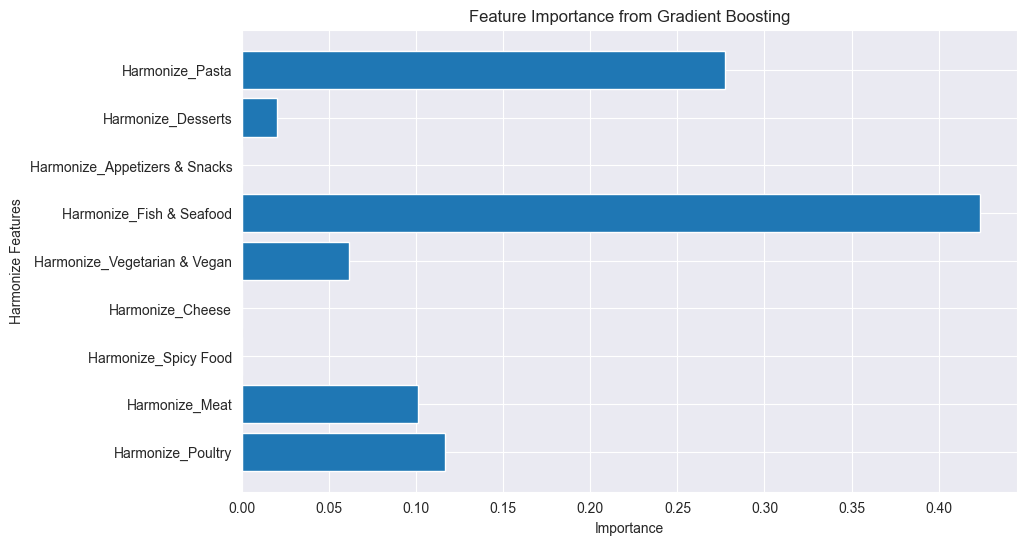

Current working directory: /Users/rcmanoel/MEIA/projetos/challenge2/MEIA_ISEP_TEAM7_2024_2025_Challenge_2/notebooks
Encoded DataFrame columns: Index(['ABV', 'Type_Dessert', 'Type_Dessert/Port', 'Type_Red', 'Type_Rosé',
       'Type_Sparkling', 'Type_White', 'Elaborate_Assemblage/Blend',
       'Elaborate_Assemblage/Bordeaux Red Blend',
       'Elaborate_Assemblage/Bourgogne Red Blend',
       ...
       'Grapes_Zinfandel', 'Harmonize_Poultry', 'Harmonize_Meat',
       'Harmonize_Spicy Food', 'Harmonize_Cheese',
       'Harmonize_Vegetarian & Vegan', 'Harmonize_Fish & Seafood',
       'Harmonize_Appetizers & Snacks', 'Harmonize_Desserts',
       'Harmonize_Pasta'],
      dtype='object', length=128)
Harmonize columns: ['Harmonize_Poultry', 'Harmonize_Meat', 'Harmonize_Spicy Food', 'Harmonize_Cheese', 'Harmonize_Vegetarian & Vegan', 'Harmonize_Fish & Seafood', 'Harmonize_Appetizers & Snacks', 'Harmonize_Desserts', 'Harmonize_Pasta']
Type columns: ['Type_Dessert', 'Type_Dessert/Port', 'Typ

In [15]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

#####
y_train_labels = y_train.idxmax(axis=1).str.replace("Type_", "", regex=True)
y_val_labels = y_val.idxmax(axis=1).str.replace("Type_", "", regex=True)
y_test_labels = y_test.idxmax(axis=1).str.replace("Type_", "", regex=True)

# Encode string labels into integers
label_encoder = LabelEncoder()
y_train_labels = label_encoder.fit_transform(y_train_labels)
y_val_labels = label_encoder.transform(y_val_labels)
y_test_labels = label_encoder.transform(y_test_labels)
#####
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Shrinkage parameter
    'estimator__max_depth': [1, 2, 3],       # Depth of the base estimator tree
    'estimator__min_samples_split': [2, 5, 10],  # Minimum samples to split
    'estimator__min_samples_leaf': [1, 2, 5]     # Minimum samples per leaf
}

# Initialize the model with DecisionTreeClassifier as the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)
adaboost_model = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Perform GridSearchCV
from joblib import parallel_backend

with parallel_backend('threading'):
    grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid,
                               cv=3, scoring='accuracy', n_jobs=1, verbose=2)
    grid_search.fit(X_train, y_train_labels)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictions using the best model
gb_val_predictions = best_model.predict(X_val)
gb_test_predictions = best_model.predict(X_test)

# Evaluate the best model
print("Ada Boosting Validation Accuracy:", accuracy_score(y_val_labels, gb_val_predictions))
print("Ada Boosting Test Accuracy:", accuracy_score(y_test_labels, gb_test_predictions))

print("Classification Report for Gradient Boosting on Test Set:")
print(classification_report(y_test_labels, gb_test_predictions))

# Feature Importance of the Best Model
feature_importances = best_model.feature_importances_

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(harmonize_columns, feature_importances, align="center")
plt.xlabel("Importance")
plt.ylabel("Harmonize Features")
plt.title("Feature Importance from Gradient Boosting")
plt.show()

# Debugging print statements
import os
print("Current working directory:", os.getcwd())
print("Encoded DataFrame columns:", encoded_df.columns)
print("Harmonize columns:", harmonize_columns)
print("Type columns:", type_columns)

### AdaBoost (Grape columns)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming encoded_df is preloaded
harmonize_columns = [col for col in encoded_df.columns if col.startswith('Harmonize_')]
type_columns = [col for col in encoded_df.columns if col.startswith('Grapes')]

X = encoded_df[harmonize_columns]
y = encoded_df[type_columns]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

#####
y_train_labels = y_train.idxmax(axis=1).str.replace("Grapes", "", regex=True)
y_val_labels = y_val.idxmax(axis=1).str.replace("Grapes", "", regex=True)
y_test_labels = y_test.idxmax(axis=1).str.replace("Grapes", "", regex=True)

# Encode string labels into integers
label_encoder = LabelEncoder()
y_train_labels = label_encoder.fit_transform(y_train_labels)
y_val_labels = label_encoder.transform(y_val_labels)
y_test_labels = label_encoder.transform(y_test_labels)
#####
# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [5, 25, 100],            # Reduced number of estimators
    'learning_rate': [0.1, 0.5, 1.0],        # Fewer learning rates
    'estimator__max_depth': [1, 2, 3],       # Depth of the base estimator tree
    'estimator__min_samples_split': [2, 5],  # Minimum samples to split
    'estimator__min_samples_leaf': [1, 2]    # Minimum samples per leaf
}

# Initialize the model with DecisionTreeClassifier as the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)
adaboost_model = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=adaboost_model, param_distributions=param_distributions,
                                   n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train_labels)

# Get the best model and its parameters
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Predictions using the best model
gb_val_predictions = best_model.predict(X_val)
gb_test_predictions = best_model.predict(X_test)

# Evaluate the best model
print("Ada Boosting Validation Accuracy:", accuracy_score(y_val_labels, gb_val_predictions))
print("Ada Boosting Test Accuracy:", accuracy_score(y_test_labels, gb_test_predictions))

print("Classification Report for ADA Boosting on Test Set:")
print(classification_report(y_test_labels, gb_test_predictions))

# Feature Importance of the Best Model
feature_importances = best_model.feature_importances_

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(harmonize_columns, feature_importances, align="center")
plt.xlabel("Importance")
plt.ylabel("Harmonize Features")
plt.title("Feature Importance from Gradient Boosting")
plt.show()

results_file = "results.txt"
with open(results_file, "w") as f:
    f.write(f"Best Parameters: {random_search.best_params_}\n")
    f.write(f"Validation Accuracy: {accuracy_score(y_val_labels, gb_val_predictions):.2f}\n")
    f.write(f"Test Accuracy: {accuracy_score(y_test_labels, gb_test_predictions):.2f}\n")
    f.write("\nClassification Report:\n")
    f.write(classification_report(y_test_labels, gb_test_predictions))


### KNN EDA

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, MinMaxScaler
import category_encoders as ce
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from ftfy import fix_text
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt


# Seaborn and Matplotlib configurations for modern aesthetics
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

# Load dataset
df = pd.read_csv('../datasets/WineDataset.csv')

# Continue with your cleaning steps...
for col in df.columns:
    if df[col].dtype == 'object': 
        df[col] = df[col].apply(lambda x: fix_text(x) if isinstance(x, str) else x)

# Print after cleaning to verify data still exists
print("\nAfter cleaning:")
print("Number of rows:", len(df))

# Select relevant columns
df = df[['Type', 'Grape', 'Price']]

# Clean the 'Price' column by extracting numerical values
df['Price'] = df['Price'].str.replace('£', '', regex=False)        
df['Price'] = df['Price'].str.replace('per bottle', '', regex=False) 

# Remover espaços extras e converter para float
df['Price'] = df['Price'].str.strip()
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop rows with missing or invalid prices
df = df.dropna(subset=['Price'])

# Drop rows with missing values in categorical columns
df = df.dropna(subset=['Type', 'Grape'])



one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
type_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[['Type']]), columns=one_hot_encoder.get_feature_names_out(['Type']))

# Inicializar o BinaryEncoder
binary_encoder = ce.BinaryEncoder(cols=['Grape'])

# Aplicar a codificação binária
grape_encoded = binary_encoder.fit_transform(df['Grape'])

# Combine all encoded data into a single dataframe
df_encoded = pd.concat([df[['Price']], type_encoded, grape_encoded], axis=1)
df_encoded = df_encoded.dropna()  # Assign the result back

scaler = MinMaxScaler()
df_encoded['Price'] = scaler.fit_transform(df_encoded[['Price']])

print(df_encoded)

# Plot distribution of Price
sns.histplot(df['Price'], kde=True, bins=30, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot Type Distribution
sns.countplot(x='Type', data=df, palette='cool')
plt.title('Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Correlation Matrix Visualization
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Detecting Outliers using Boxplot

# Calculate IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate whisker boundaries
whisker_min = Q1 - 1.5 * IQR 
whisker_max = Q3 + 1.5 * IQR

# Print IQR statistics
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')
print(f'Lower whisker: {whisker_min}')
print(f'Upper whisker: {whisker_max}')

# Boxplot
plt.figure(figsize=(10, 6))
max_price = df['Price'].max()
plt.xticks(np.arange(0, max_price + 50, 50))  # Para intervalos de 50
sns.boxplot(x=df['Price'], color='red')
plt.title('Outliers in Price')
plt.xlabel('Price')
plt.tight_layout()
plt.show()




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df_encoded['Price'] = df['Price']

df_encoded_clean = df_encoded.dropna()
features = df_encoded_clean.drop(columns=['Price']).values
labels = df_encoded_clean['Price'].values

pca = PCA(n_components=2)
df_pca = pca.fit_transform(features)

unique_labels = np.unique(labels)
step = 10

for i in range(0, len(unique_labels), step):
    plt.figure(figsize=(8, 6))
    subset_labels = unique_labels[i:i + step]
    
    for label in subset_labels:
        indices = np.where(labels == label)[0]
        plt.scatter(
            df_pca[indices, 0],
            df_pca[indices, 1],
            label=f'Price: {label:.4f}'
        )
    
    plt.title('PCA (2D) - Coloreado por Precio')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(title='Rango de Precios', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### KNN Algorithm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming df_encoded is already defined and contains the dataset
df = df_encoded

X = df.drop('Price', axis=1)  # Features
y = df['Price']  # Target variable (Price)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {'n_neighbors': range(1, 31)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)  # Fit the GridSearchCV object

# Best hyperparameters
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k: {best_k}")

# Train the model with the best k
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Scatter plot: Actual vs. Predicted
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Evaluate error for different k values
errors = []
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

# Plot error vs. k
plt.plot(range(1, 21), errors)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.title('Error vs. k')
plt.show()
